# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [18]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [19]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print (df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [21]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer:  There are 400 observations 

#### Question 2. Create a summary table

In [22]:
df_raw.describe()


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [12]:
df_raw.columns




Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')

In [11]:
df_raw.head


<bound method NDFrame.head of      admit    gre   gpa  prestige
0        0  380.0  3.61       3.0
1        1  660.0  3.67       3.0
2        1  800.0  4.00       1.0
3        1  640.0  3.19       4.0
4        0  520.0  2.93       4.0
5        1  760.0  3.00       2.0
6        1  560.0  2.98       1.0
7        0  400.0  3.08       2.0
8        1  540.0  3.39       3.0
9        0  700.0  3.92       2.0
10       0  800.0  4.00       4.0
11       0  440.0  3.22       1.0
12       1  760.0  4.00       1.0
13       0  700.0  3.08       2.0
14       1  700.0  4.00       1.0
15       0  480.0  3.44       3.0
16       0  780.0  3.87       4.0
17       0  360.0  2.56       3.0
18       0  800.0  3.75       2.0
19       1  540.0  3.81       1.0
20       0  500.0  3.17       3.0
21       1  660.0  3.63       2.0
22       0  600.0  2.82       4.0
23       0  680.0  3.19       4.0
24       1  760.0  3.35       2.0
25       1  800.0  3.66       1.0
26       1  620.0  3.61       1.0
27       1  520.0 

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: A larger standard devisation means that a majority of deviations far from the mean. A larger standard deviation also shows that the data is widely spread, which may mean that it is less reliable. 

For GRE, there tends to be more deviations far from the mean compared to GPA. For GPA, there may be moderation by the schools the students belong to to bring the scores closer to the mean. 



#### Question 4. Drop data points with missing data


In [13]:
df_raw.dropna(axis = 0, how ='any')   ## add an extra step IF there was a 0 

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [14]:
pd.isnull(df_raw)

,admit,gre,gpa,prestige
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [16]:
df_raw.dropna(axis = 0, how ='any')

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [ ]:
WIthout using the drop, there are 400 rows. After drop there are 397 rows. Hence 3 rows have empty data. 

#### Question 6. Create box plots for GRE and GPA

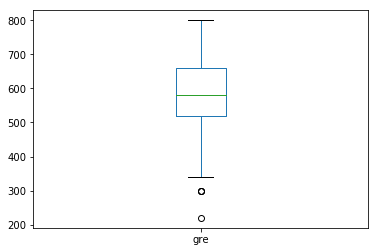

In [17]:
df_raw.gre.plot(kind='box')


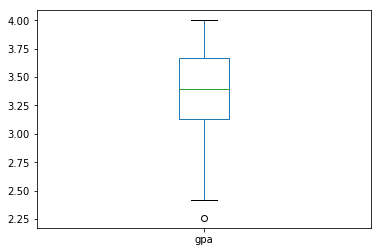

In [18]:
df_raw.gpa.plot(kind='box')

#### Question 7. What do this plots show?

Answer: There are 2 outliers for GRE and 1 outlier for GPA. 
For GRE, the 25th and 75th percentile are equally far apart from the mean. 
For GPA, the 25th percentile is very much further down from the mean, as compared to the 75th percentile. 

In [58]:

print ( min(df_raw.gre),  " is the lowest GRE outlier")

220.0  is the lowest GRE outlier


In [59]:

print (min(df_raw.gpa), " is the lowest GPA outlier")

2.26  is the lowest GPA outlier


#### Question 8. Describe each distribution 

In [42]:
# plot the distribution of each variable 

####*************************************************Tried 2 types of subplot code, have 2 questions please: 
    
#1. Why doesnt the below code work?
#fig, ax = plt.subplots(nrows = 2, ncols = 2)
#ax = fig.add_subplot(df_raw.admit)
#ax = fig.add_subplot(df_raw.gre)
#ax = fig.add_subplot(df_raw.gpa)
#ax = fig.add_subplot(df_raw.prestige)

#. Why doesnt the below code work also?
#for row in ax: 
#    for col in row: 
#        col.plot(df_raw.admit)
#        col.plot(df_raw.gre)
#        col.plot(df_raw.gpa)
#        col.plot(df_raw.prestige)
#plt.subplot(df_raw.admit)
#df_raw.subplots("admit", "gre", "gpa", "prestige", kind='hist', bins=50)



SyntaxError: invalid syntax (<ipython-input-42-5d7b389cc65c>, line 3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001475E41C9B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001475FBE2E10>]], dtype=object)

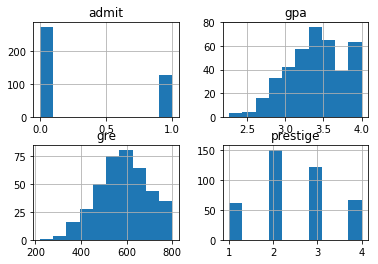

In [23]:
df_raw.hist()

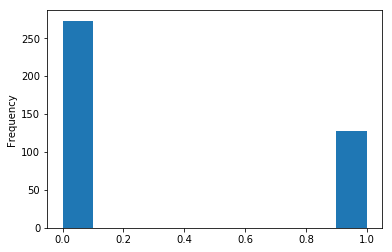

In [24]:
df_raw.admit.plot(kind='hist', bins=10)

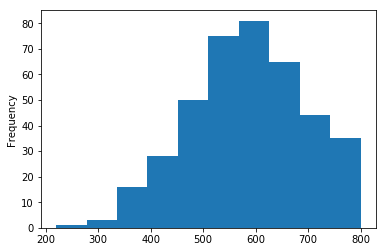

In [39]:
df_raw.gre.plot(kind='hist', bins=10)

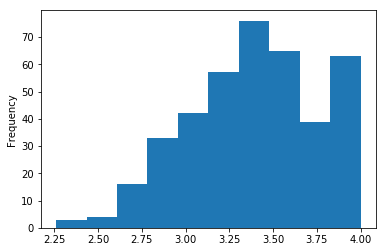

In [40]:
df_raw.gpa.plot(kind='hist', bins=10)

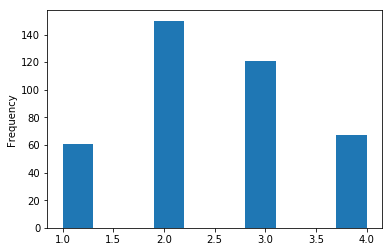

In [41]:
df_raw.prestige.plot(kind='hist', bins=10)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: GRE and Prestige have close to "Normal distribution" shapes. However, GPA does not look like a normal distribution due to a dip around 3.75.  

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: GPA can have a correction

#### Question 11. Which of our variables are potentially colinear? 

In [61]:
# create a correlation matrix for the data

Answer: GRE and GPA and prestige all could be collinear



In [67]:

import seaborn as sns

In [71]:
# why doesnt the below work 
sns.heatmap(df_raw[["admit", "gre", "gpa", "prestige"]].corr()

SyntaxError: unexpected EOF while parsing (<ipython-input-71-2abaf143e49a>, line 2)

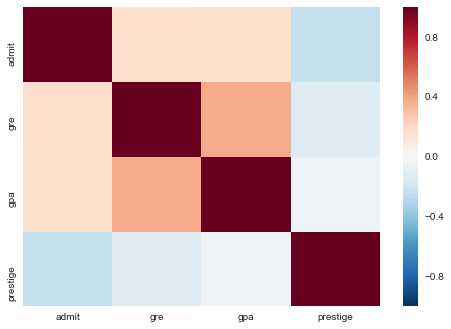

In [73]:
sns.heatmap(df_raw.corr())
plt.show()

#### Question 12. What did you find?

Answer: from the sns.heatmap, can see that there is high collinearity between GRE and GPA, and mildly high collinearity between GRE and admit; GRE and admit



#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: test with 3 models: 
A) use GRE and GPA and Prestige
B) use only GRE and Prestige
C) use only Prestige

The reason is to see which model has the highest R squared value, which means the model can explain the highest perentage of the variances 

#### Question 14. What is your hypothesis? 

Answer: Hypothesis is that grad school admissions rates do NOT increase the higher the prestige of undergraduate schools.

In [76]:
import statsmodels.formula.api as smf
lm2 = smf.ols(data = df_raw, formula = "admit ~ prestige").fit()


lm2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     24.56
Date:                Sat, 24 Jun 2017   Prob (F-statistic):           1.07e-06
Time:                        02:00:26   Log-Likelihood:                -248.52
No. Observations:                 399   AIC:                             501.0
Df Residuals:                     397   BIC:                             509.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6112      0.064      9.585      0.000       0.486       0.737
prestige      -0.1188      0.024     -4.955      0.000      -0.166      -0.072
==============================================================================
Omnibus:                      277.527   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.297
Skew:                           0.726   Prob(JB):                     1.33e-13
Kurtosis:                       1.793   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
co-efficient is -0.1188. This means for every increase by 1 of the prestige, the admit decreases by 0.118.

p-value is very small so it is statistically significant 

R squared value now is 0.058. This model explans 5.8% of the variance in flat prices

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [26]:
#Alternative is: 
# Impute missing values with mean values in the dataset 
    
newdf_raw = df_raw.replace("NA", df_raw.mean)    # This doesnt seem to replace the NA values with a "mean". 
# Then again, I need to find out which mean value it is 


In [55]:
print(df_raw.gre.mean)   # dont know why this isnt showing mean 


<bound method Series.mean of 0      380.0
1      660.0
2      800.0
3      640.0
4      520.0
5      760.0
6      560.0
7      400.0
8      540.0
9      700.0
10     800.0
11     440.0
12     760.0
13     700.0
14     700.0
15     480.0
16     780.0
17     360.0
18     800.0
19     540.0
20     500.0
21     660.0
22     600.0
23     680.0
24     760.0
25     800.0
26     620.0
27     520.0
28     780.0
29     520.0
       ...  
370    540.0
371    680.0
372    680.0
373    620.0
374    560.0
375    560.0
376    620.0
377    800.0
378    640.0
379    540.0
380    700.0
381    540.0
382    540.0
383    660.0
384    480.0
385    420.0
386    740.0
387    580.0
388    640.0
389    640.0
390    800.0
391    660.0
392    600.0
393    620.0
394    460.0
395    620.0
396    560.0
397    460.0
398    700.0
399    600.0
Name: gre, Length: 400, dtype: float64>


In [53]:
(df_raw.gre== None).sum()     # trying to find the null value    

0

In [52]:
(df_raw.prestige== None).sum()   # trying to find the null value 

0

In [59]:
(df_raw.gpa== None).sum()  # trying to find the null value 

0

In [62]:
df_raw.isnull().any(axis = 0 )   # seems like the result of this shows there are no null values. 

admit       False
gre         False
gpa         False
prestige    False
dtype: bool

In [63]:
df_raw.isnull().any(axis = 1 )

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
370    False
371    False
372    False
373    False
374    False
375    False
376    False
377    False
378    False
379    False
380    False
381    False
382    False
383    False
384    False
385    False
386    False
387    False
388    False
389    False
390    False
391    False
392    False
393    False
394    False
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [58]:
df_raw.fillna(df_raw.mean, inplace = True)     # is this the correct code?


In [75]:
to_log = ["admit"] 
df_log = df_raw[to_log].applymap(lambda x: np.log(x+1))


df_log.columns = "log_" + df_raw.log.columns    # do not know why this syntax is wrong 


df_log.index = df_log.index + 1




AttributeError: 'DataFrame' object has no attribute 'log'

#### 3. Advanced: Impute missing data

In [77]:
   df_log[df_log.isnull()] = - 1    # googled this, not sure if correct 